In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium import plugins
import json
sns.set()

In [2]:
import matplotlib
from matplotlib import font_manager, rc
import platform
if platform.system()=="Windows":
    font_name=font_manager.FontProperties(fname="malgun.ttf").get_name()
    rc('font', family=font_name)
matplotlib.rcParams['axes.unicode_minus']=False

import warnings
warnings.filterwarnings("ignore")

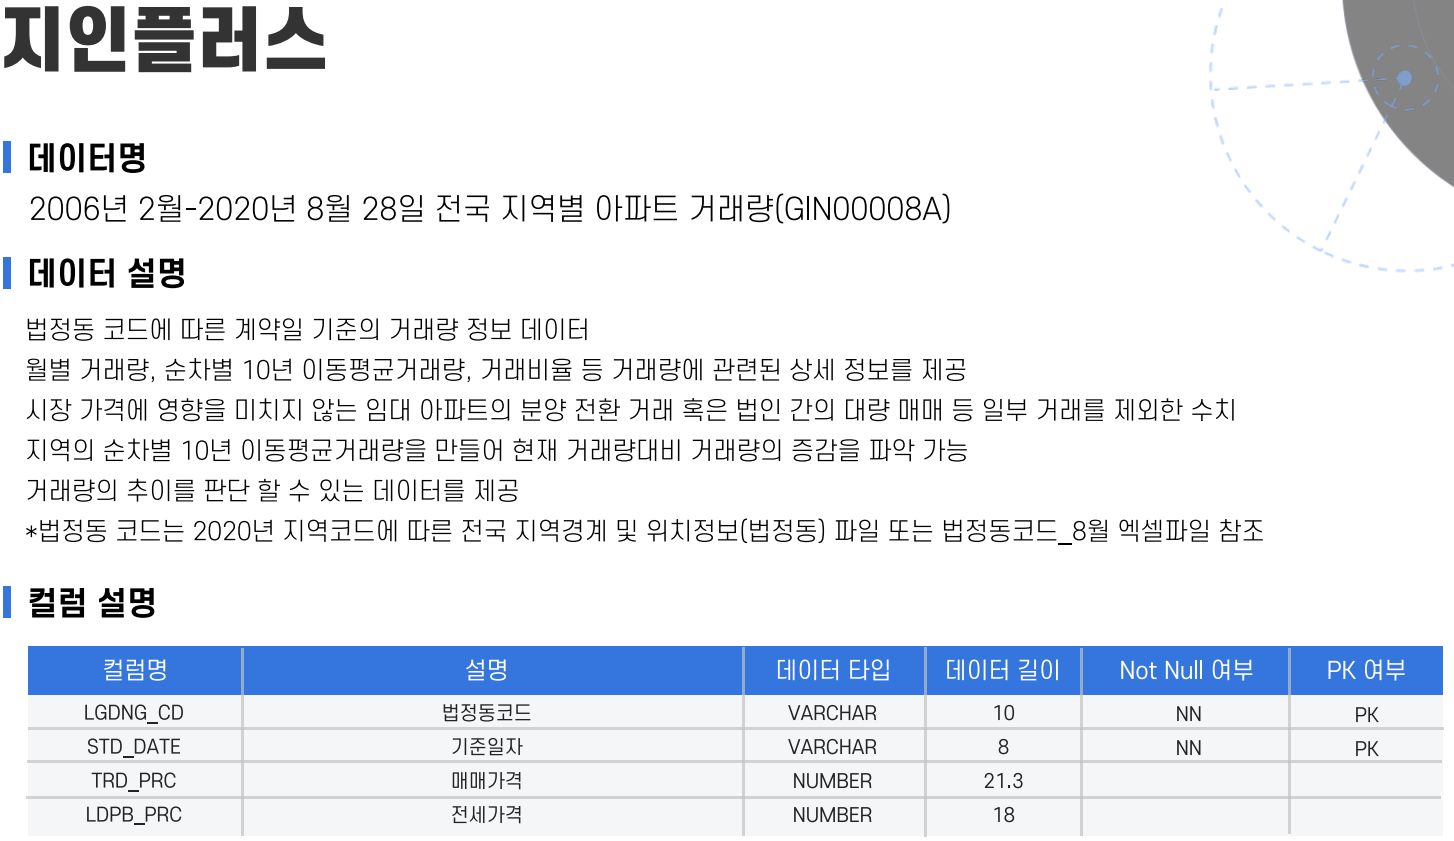

In [3]:
apt_amountdiet={'lgdng_cd':'법정동코드','std_date':'기준일자','trd_prc':'매매가격','ldpb_prc':'전세가격'}
apt_amount = pd.read_csv("./sample/GIN00009A.csv",parse_dates=['std_date'])
apt_amount=apt_amount.rename(columns=apt_amountdiet)

In [4]:
#날짜 수정
apt_amount['년']=apt_amount['기준일자'].dt.year
apt_amount['월']=apt_amount['기준일자'].dt.month
apt_amount['일']=apt_amount['기준일자'].dt.day
apt_amount=apt_amount.drop(['기준일자'],axis=1)

In [5]:
apt_amount=apt_amount[apt_amount['일']==21] #기준일은 21일로 정함
apt_amount=apt_amount.drop(['일'],axis=1)

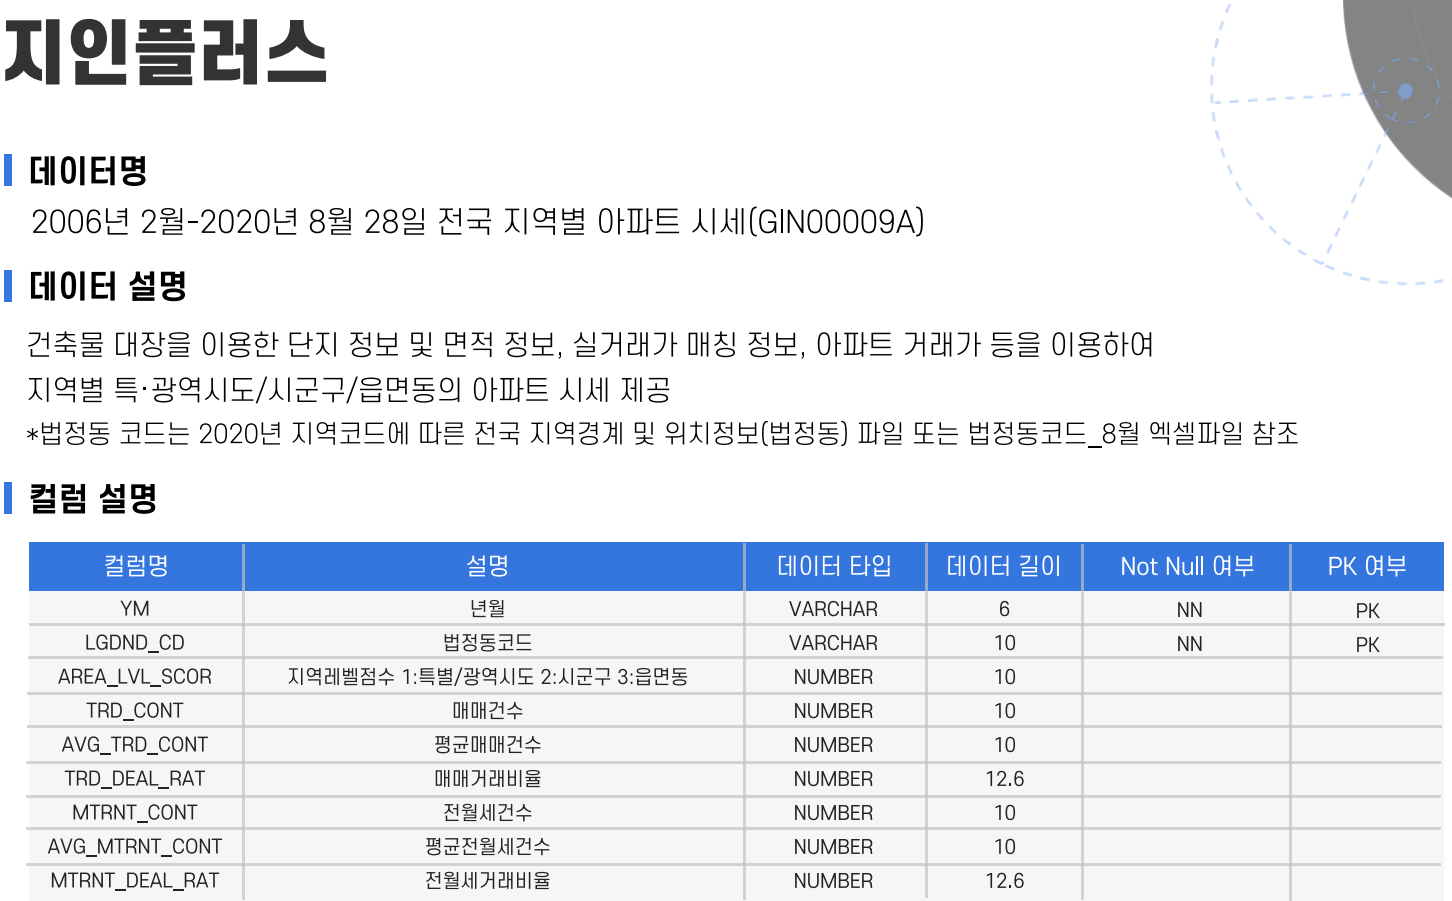

In [6]:
apt_pricediet={'ym':'년월','area_lvl_scor':'지역레벨점수','lgdng_cd':'법정동코드','trd_cont':'매매건수','avg_trd_cont':'평균매매건수','trd_deal_rat':'매매거래비율','mtrnt_cont':'전월세건수','avg_mtrnt_cont':'평균전월세건수','mtrnt_deal_rat':'전월세거래비율'}
apt_price = pd.read_csv("./sample/GIN00008A.csv",parse_dates=['ym'])
apt_price=apt_price.rename(columns=apt_pricediet)

In [7]:
# area_lvl_scor 지역점수 [1,2,3]으로 되어 있다 0은 제외
print(apt_price['지역레벨점수'].unique())
apt_price=apt_price[apt_price['지역레벨점수']!=0]

[0 1 2 3]


In [8]:
#날짜 수정
apt_price['년']=apt_price['년월'].apply(lambda x : int(x[0:4]) )
apt_price['월']=apt_price['년월'].apply(lambda x : int(x[4:6]) )

In [9]:
apts=apt_amount.merge(apt_price)

In [10]:
apts['법정동코드']=apts['법정동코드'].astype('category')
apts['지역레벨점수']=apts['지역레벨점수'].astype('category')

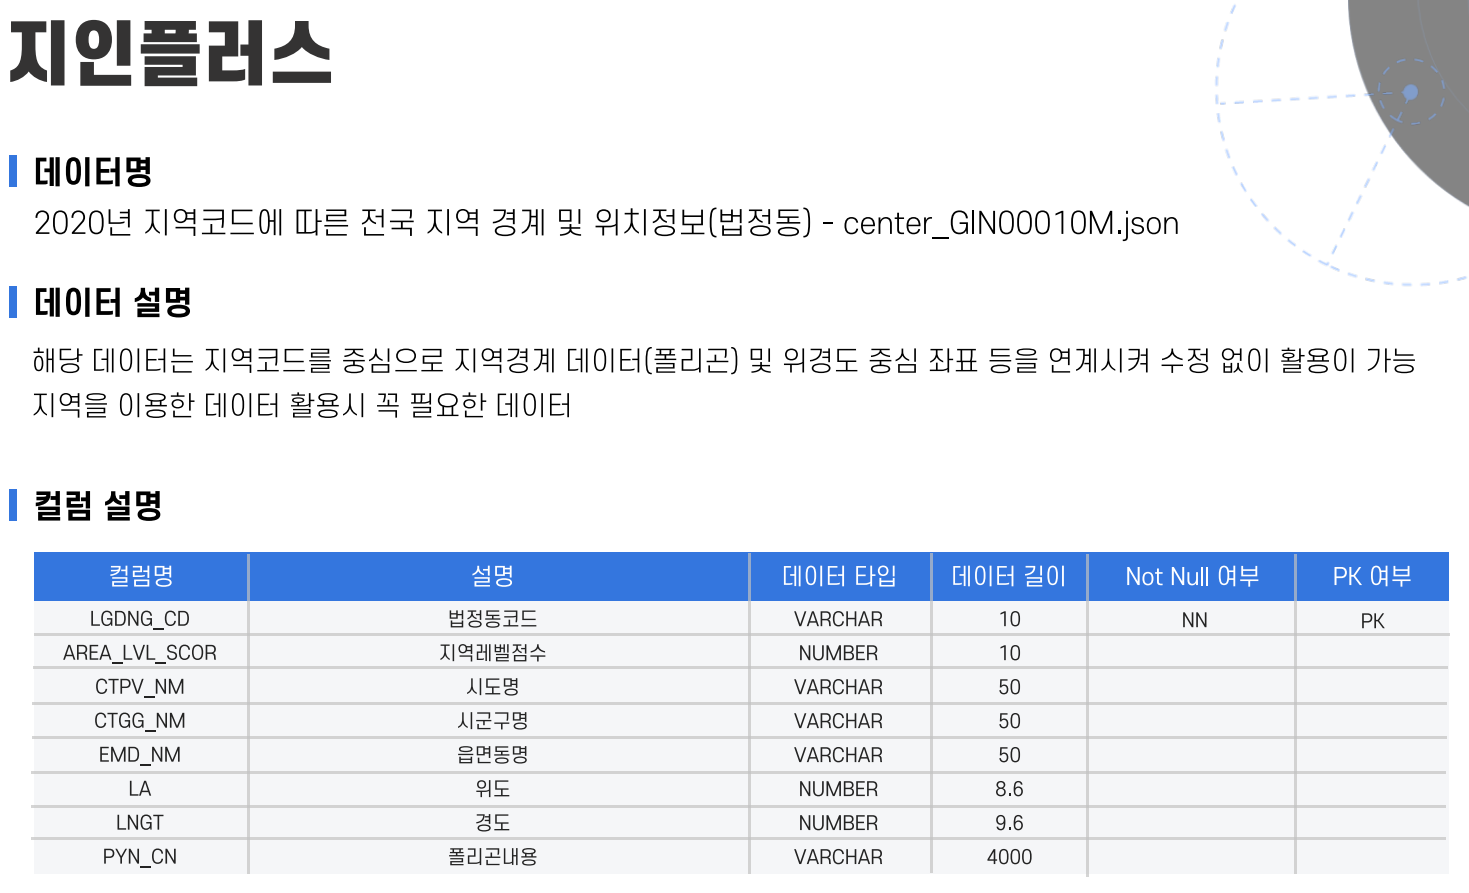

In [11]:
regiondiet={'AREA_LVL_SCOR':'지역레벨점수','LGDNG_CD':'법정동코드','CTPV_NM':'시도명','CTGG_NM':'시군구명','EMD_NM':'읍면동명','LA':'위도','LNGT':'경도','PYN_CN':'폴리곤내용'}
region = pd.read_json("./sample/center_GIN00010M.json")
region=region.rename(columns=regiondiet)

In [12]:
# reg = pd.read_json("./sample/center_GIN00010M.json")
# reg=reg[(reg['AREA_LVL_SCOR']==2) & (reg['CTPV_NM']=='경기도') | (reg['CTPV_NM']=='서울특별시')]
# # reg=reg[(reg['AREA_LVL_SCOR']==1)]
# reg['PYN_CN'].str[-1].values


In [13]:
# temp=[]
# for i in reg.index:
#     features={}
#     features["type"]="Feature"
#     features["properties"]={"AREA_LVL_SCOR":reg["AREA_LVL_SCOR"][i],"LGDNG_CD":reg["LGDNG_CD"][i],"CTPV_NM":reg["CTPV_NM"][i],"CTGG_NM":reg["CTGG_NM"][i],"EMD_NM":reg["EMD_NM"][i],"LA":reg["LA"][i],"LNGT":reg["LNGT"][i]}
#     features["geometry"]=eval(reg["PYN_CN"][i])
#     temp.append(features)
# geo_data={
# "type": "FeatureCollection",
# "crs": { "type": "name", "properties": { "name": "urn:ogc:def:crs:OGC:1.3:CRS84" } },
# "features":temp}

In [14]:
# geo_data

In [15]:
# f=open('geo_data.txt','w')
# f.write(str(geo_data))
# f.close()

In [16]:
apts=apts.merge(region)

In [17]:
apts['전월세건수'][apts['전세가격'].isnull()]=np.nan
apts['평균전월세건수'][apts['전월세거래비율'].isnull()]=np.nan

In [18]:
apts['년월']=apts['년월'].astype('int64')
apts=apts[(apts['년월']>201612) & (apts['년월']<202008)]

In [19]:
ym=[201706,201708,201709,201710,201711,201712,201806,201807,201808,201809,201812,201901,201904,201905,201908,201910,201911,201912,202002,202005,202007]
apt_s=apts[apts['년월'].isin(ym)]

In [20]:
a1=apts[apts['지역레벨점수']==1]
a1_s=apt_s[apt_s['지역레벨점수']==1]

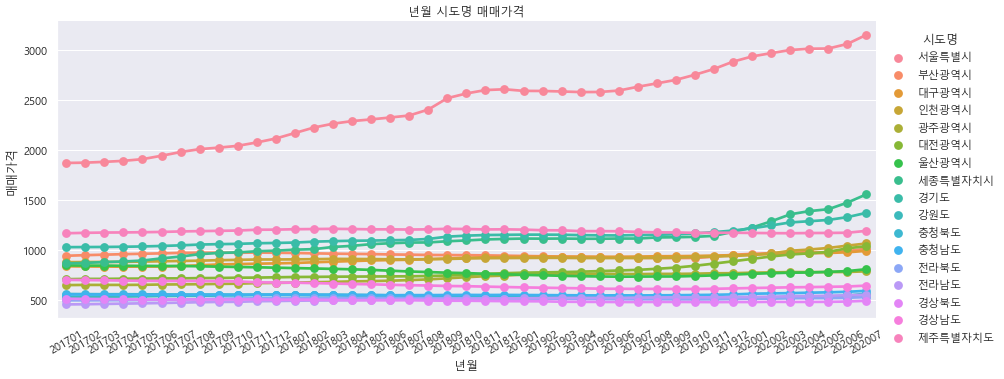

In [21]:
sns.factorplot(x='년월',y='매매가격',hue='시도명',aspect=2.5,data=a1)
plt.xticks(rotation=30)
plt.title('년월 시도명 매매가격')
plt.show()

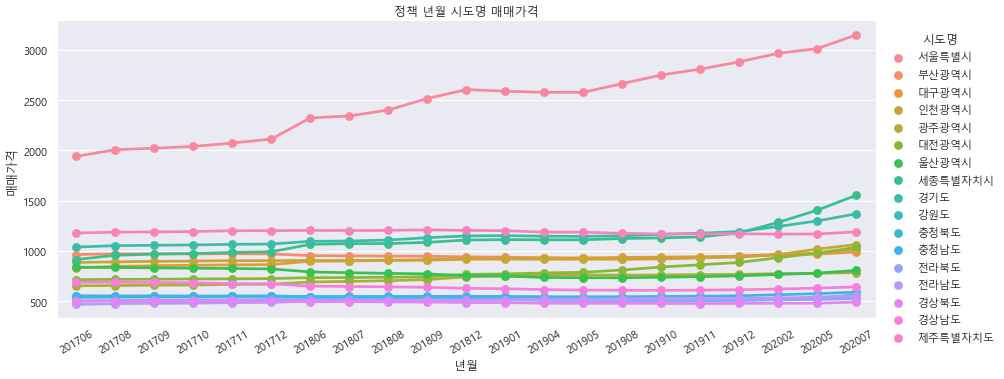

In [22]:
sns.factorplot(x='년월',y='매매가격',hue='시도명',aspect=2.5,data=a1_s)
plt.xticks(rotation=30)
plt.title('정책 년월 시도명 매매가격')
plt.show()

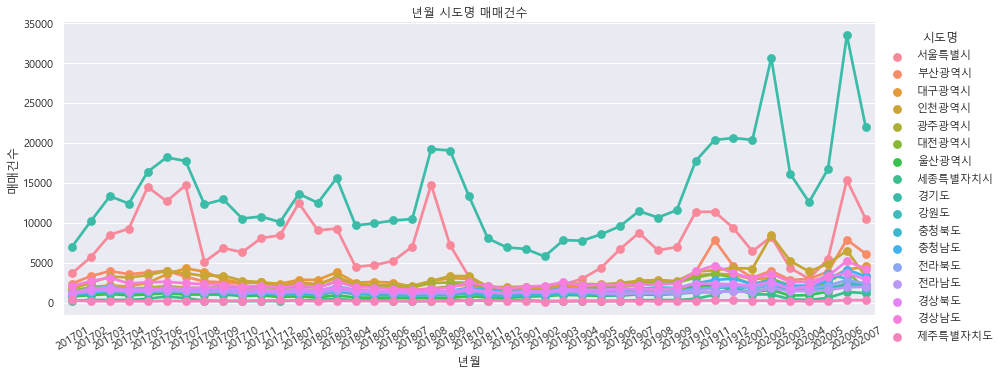

In [23]:
sns.factorplot(x='년월',y='매매건수',hue='시도명',aspect=2.5,data=a1)
plt.xticks(rotation=30)
plt.title('년월 시도명 매매건수')
plt.show()

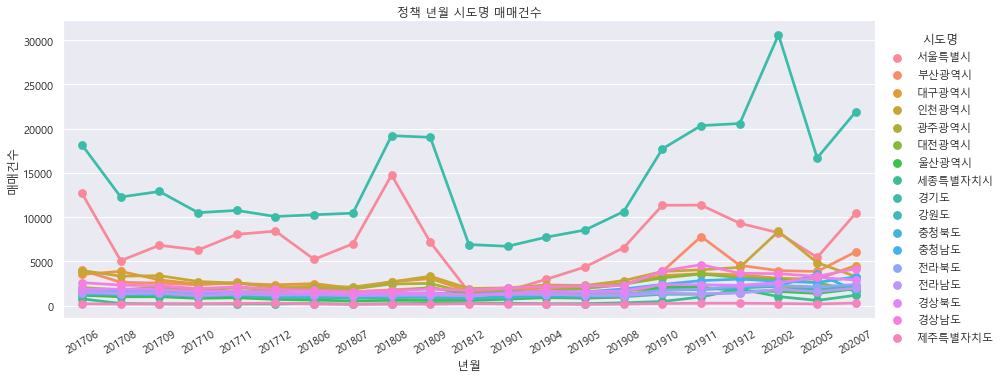

In [24]:
sns.factorplot(x='년월',y='매매건수',hue='시도명',aspect=2.5,data=a1_s)
plt.xticks(rotation=30)
plt.title('정책 년월 시도명 매매건수')
plt.show()

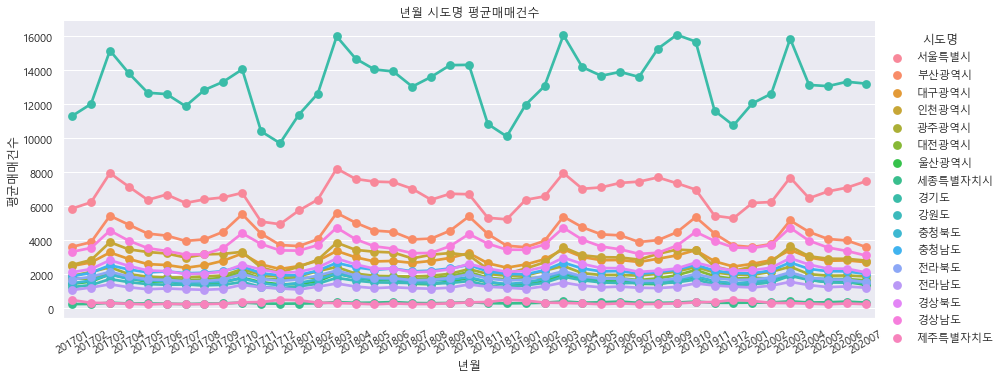

In [25]:
sns.factorplot(x='년월',y='평균매매건수',hue='시도명',aspect=2.5,data=a1)
plt.xticks(rotation=30)
plt.title('년월 시도명 평균매매건수')
plt.show()

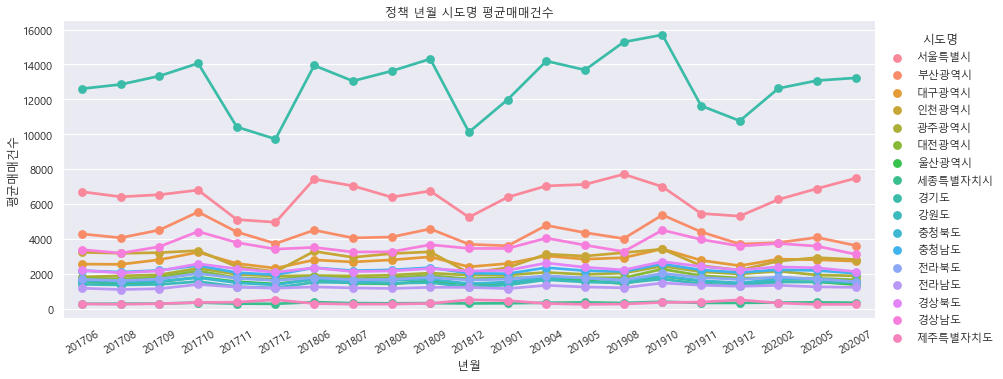

In [26]:
sns.factorplot(x='년월',y='평균매매건수',hue='시도명',aspect=2.5,data=a1_s)
plt.xticks(rotation=30)
plt.title('정책 년월 시도명 평균매매건수')
plt.show()

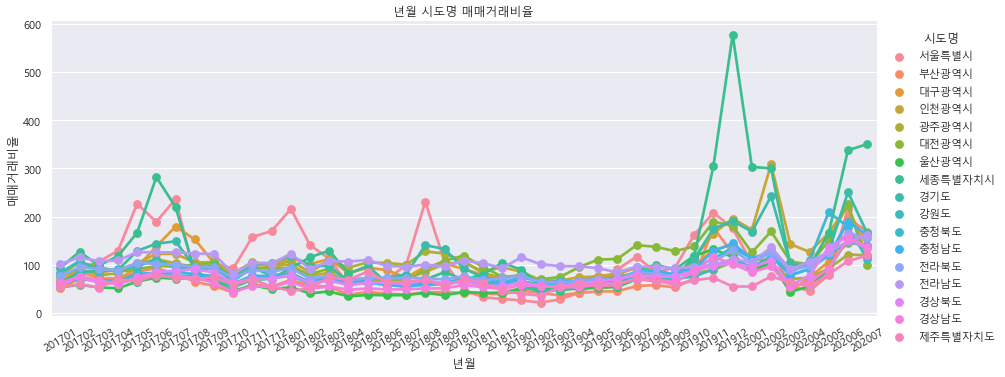

In [27]:
sns.factorplot(x='년월',y='매매거래비율',hue='시도명',aspect=2.5,data=a1)
plt.xticks(rotation=30)
plt.title('년월 시도명 매매거래비율')
plt.show()

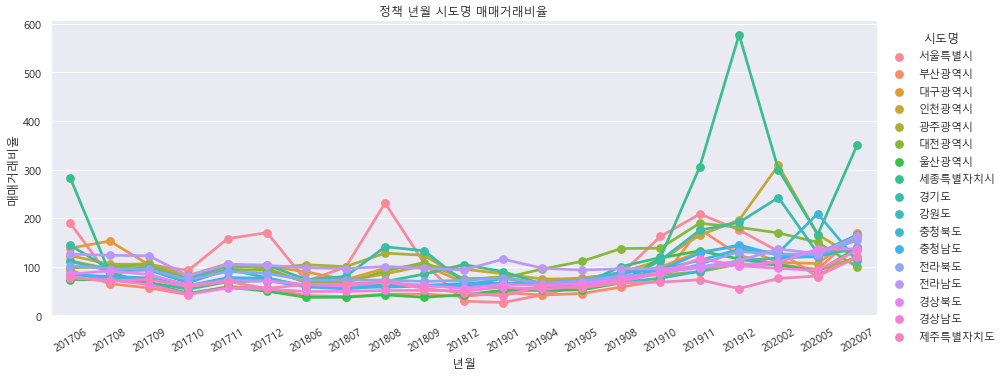

In [28]:
sns.factorplot(x='년월',y='매매거래비율',hue='시도명',aspect=2.5,data=a1_s)
plt.xticks(rotation=30)
plt.title('정책 년월 시도명 매매거래비율')
plt.show()

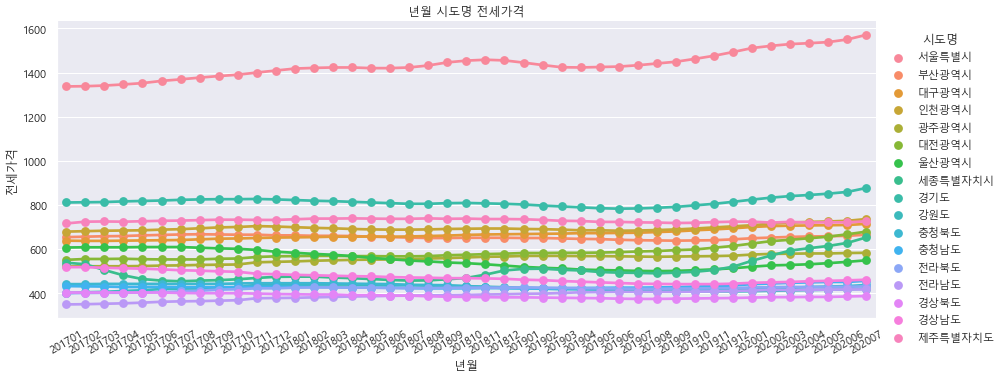

In [29]:
sns.factorplot(x='년월',y='전세가격',hue='시도명',aspect=2.5,data=a1)
plt.xticks(rotation=30)
plt.title('년월 시도명 전세가격')
plt.show()

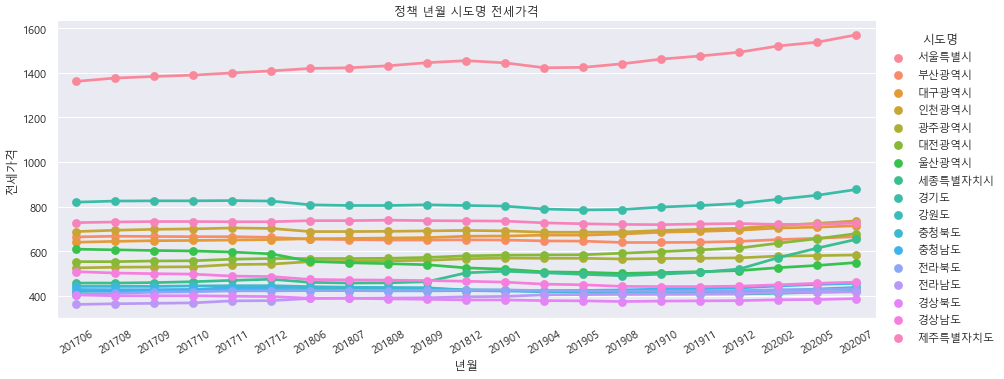

In [30]:
sns.factorplot(x='년월',y='전세가격',hue='시도명',aspect=2.5,data=a1_s)
plt.xticks(rotation=30)
plt.title('정책 년월 시도명 전세가격')
plt.show()

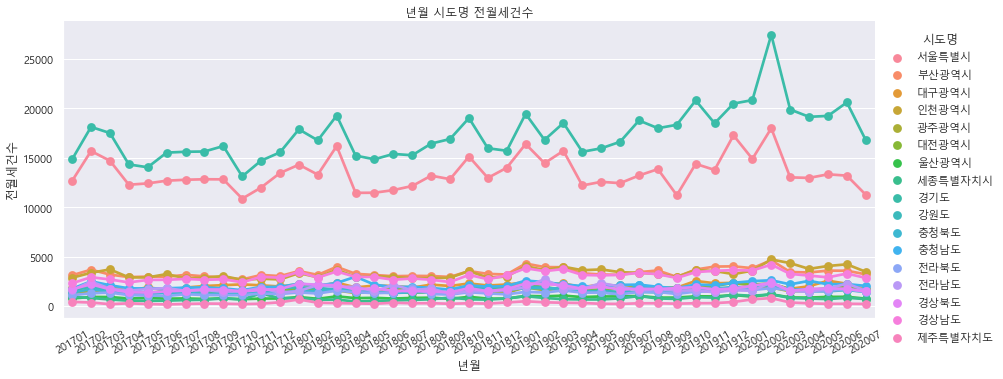

In [31]:
sns.factorplot(x='년월',y='전월세건수',hue='시도명',aspect=2.5,data=a1)
plt.xticks(rotation=30)
plt.title('년월 시도명 전월세건수')
plt.show()

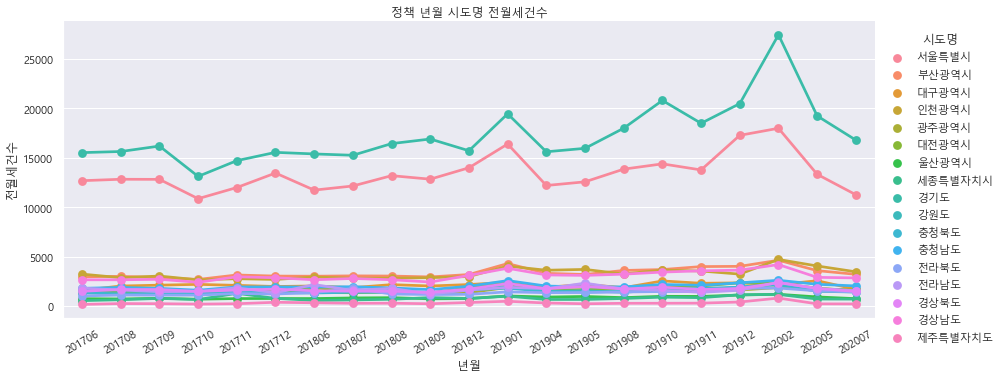

In [32]:
sns.factorplot(x='년월',y='전월세건수',hue='시도명',aspect=2.5,data=a1_s)
plt.xticks(rotation=30)
plt.title('정책 년월 시도명 전월세건수')
plt.show()

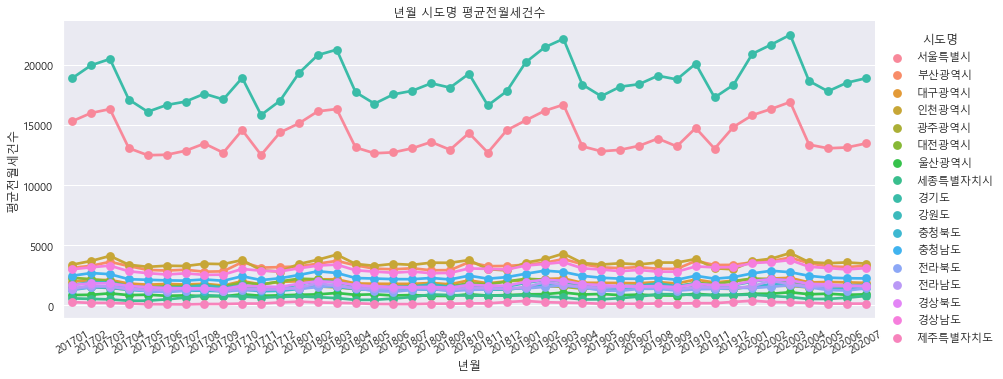

In [33]:
sns.factorplot(x='년월',y='평균전월세건수',hue='시도명',aspect=2.5,data=a1)
plt.xticks(rotation=30)
plt.title('년월 시도명 평균전월세건수')
plt.show()

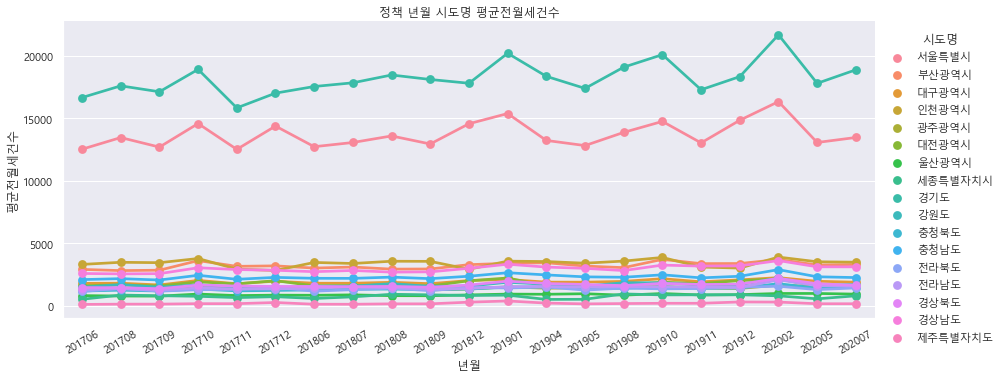

In [34]:
sns.factorplot(x='년월',y='평균전월세건수',hue='시도명',aspect=2.5,data=a1_s)
plt.xticks(rotation=30)
plt.title('정책 년월 시도명 평균전월세건수')
plt.show()

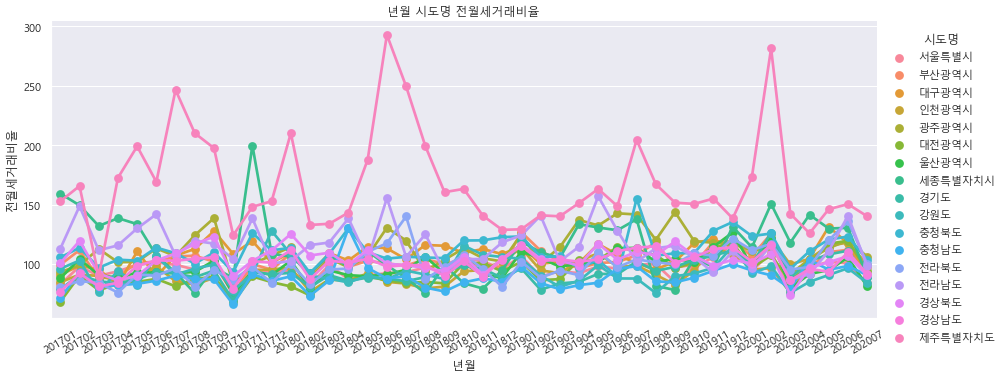

In [35]:
sns.factorplot(x='년월',y='전월세거래비율',hue='시도명',aspect=2.5,data=a1)
plt.xticks(rotation=30)
plt.title('년월 시도명 전월세거래비율')
plt.show()

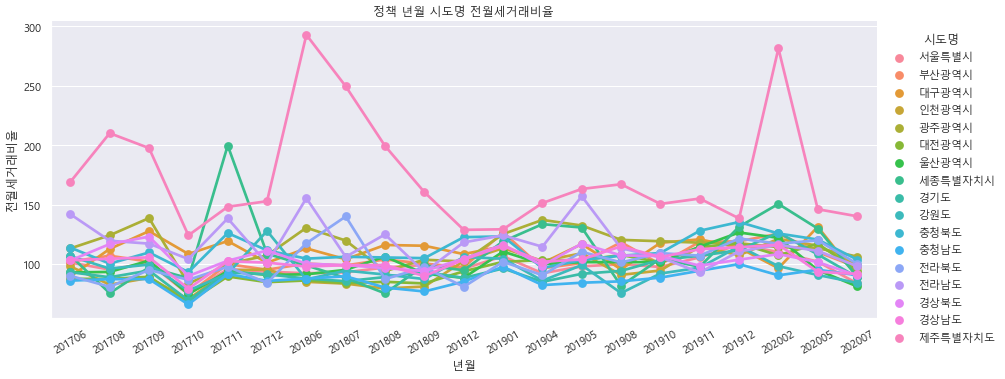

In [36]:
sns.factorplot(x='년월',y='전월세거래비율',hue='시도명',aspect=2.5,data=a1_s)
plt.xticks(rotation=30)
plt.title('정책 년월 시도명 전월세거래비율')
plt.show()

In [37]:
a1_2020=a1[a1['년월']==202002]
a1_2019=a1[a1['년월']==201902]

In [38]:
center = [35.9, 127.986]
m = folium.plugins.DualMap(location=center,zoom_start=7)
folium.Choropleth( geo_data='CTPV.geojson',data=a1_2019,
                  key_on='feature.properties.CTPV_NM',columns=('시도명', '매매가격'),
                  fill_color='OrRd', legend_name='매매가격').add_to(m.m1)
plugins.MarkerCluster(a1_2019[['위도','경도']].values,
                      popups = list(a1_2019[['시도명','매매가격']].values)).add_to(m.m1)
folium.Choropleth( geo_data='CTPV.geojson',data=a1_2020,
                  key_on='feature.properties.CTPV_NM',columns=('시도명', '매매가격'),
                  fill_color='OrRd', legend_name='매매가격').add_to(m.m2)
plugins.MarkerCluster(a1_2020[['위도','경도']].values,
                      popups = list(a1_2020[['시도명','매매가격']].values)).add_to(m.m2)
m.save("2019&2020 대한민국 비교 매매가격.html")


In [39]:
center = [35.9, 127.986]
m = folium.plugins.DualMap(location=center,zoom_start=7)
folium.Choropleth( geo_data='CTPV.geojson',data=a1_2019,
                  key_on='feature.properties.CTPV_NM',columns=('시도명', '매매건수'),
                  fill_color='BuGn', legend_name='매매건수').add_to(m.m1)
plugins.MarkerCluster(a1_2019[['위도','경도']].values,
                      popups = list(a1_2019[['시도명','매매건수']].values)).add_to(m.m1)
folium.Choropleth( geo_data='CTPV.geojson',data=a1_2020,
                  key_on='feature.properties.CTPV_NM',columns=('시도명', '매매건수'),
                  fill_color='BuGn', legend_name='매매건수').add_to(m.m2)
plugins.MarkerCluster(a1_2020[['위도','경도']].values,
                      popups = list(a1_2020[['시도명','매매건수']].values)).add_to(m.m2)
m.save("2019&2020 대한민국 비교 매매건수.html")


In [40]:
center = [35.9, 127.986]
m = folium.plugins.DualMap(location=center,zoom_start=7)
folium.Choropleth( geo_data='CTPV.geojson',data=a1_2019,
                  key_on='feature.properties.CTPV_NM',columns=('시도명', '전세가격'),
                  fill_color='OrRd', legend_name='전세가격').add_to(m.m1)
plugins.MarkerCluster(a1_2019[['위도','경도']].values,
                      popups = list(a1_2019[['시도명','전세가격']].values)).add_to(m.m1)
folium.Choropleth( geo_data='CTPV.geojson',data=a1_2020,
                  key_on='feature.properties.CTPV_NM',columns=('시도명', '전세가격'),
                  fill_color='OrRd', legend_name='전세가격').add_to(m.m2)
plugins.MarkerCluster(a1_2020[['위도','경도']].values,
                      popups = list(a1_2020[['시도명','전세가격']].values)).add_to(m.m2)
m.save("2019&2020 대한민국 비교 전세가격.html")


In [41]:
center = [35.9, 127.986]
m = folium.plugins.DualMap(location=center,zoom_start=7)
folium.Choropleth( geo_data='CTPV.geojson',data=a1_2019,
                  key_on='feature.properties.CTPV_NM',columns=('시도명', '전월세건수'),
                  fill_color='BuGn', legend_name='전월세건수').add_to(m.m1)
plugins.MarkerCluster(a1_2019[['위도','경도']].values,
                      popups = list(a1_2019[['시도명','전월세건수']].values)).add_to(m.m1)
folium.Choropleth( geo_data='CTPV.geojson',data=a1_2020,
                  key_on='feature.properties.CTPV_NM',columns=('시도명', '전월세건수'),
                  fill_color='BuGn', legend_name='전월세건수').add_to(m.m2)
plugins.MarkerCluster(a1_2020[['위도','경도']].values,
                      popups = a1_2020[['시도명','전월세건수']].values.tolist()).add_to(m.m2)
m.save("2019&2020 대한민국 비교 전월세건수.html")


In [42]:
mylist=['매매가격','매매건수','전세가격','전월세건수']
for i in mylist:
    a1[i+'scale']=(a1[i]-a1[i].min())/(a1[i].max()-a1[i].min())+0.01

In [43]:
a1_pt=pd.pivot_table(a1 , index=('년월','시도명') , values=('위도','경도','매매가격scale'))
nl=[]
for i in a1['년월'].unique():
    temp=a1_pt.loc[i][['위도','경도','매매가격scale']].values.tolist()
    nl.append(temp)
center = [35.9, 127.986]
m = folium.Map(location=center, zoom_start=7)
hm = plugins.HeatMapWithTime(nl,index=a1['년월'].unique().tolist(), radius = 0.8,min_speed=8,max_speed=24,scale_radius=True)
hm.add_to(m)
m.save("대한민국 년월별 매매가격 변화.html")


In [44]:
a1_pt=pd.pivot_table(a1 , index=('년월','시도명') , values=('위도','경도','매매건수scale'))
nl=[]
for i in a1['년월'].unique():
    temp=a1_pt.loc[i][['위도','경도','매매건수scale']].values.tolist()
    nl.append(temp)
center = [35.9, 127.986]
m = folium.Map(location=center, zoom_start=7)
hm = plugins.HeatMapWithTime(nl,index=a1['년월'].unique().tolist(), radius = 0.8,min_speed=8,max_speed=24,scale_radius=True)
hm.add_to(m)
m.save("대한민국 년월별 매매건수 변화.html")


In [45]:
a1_pt=pd.pivot_table(a1 , index=('년월','시도명') , values=('위도','경도','전세가격scale'))
nl=[]
for i in a1['년월'].unique():
    temp=a1_pt.loc[i][['위도','경도','전세가격scale']].values.tolist()
    nl.append(temp)
center = [35.9, 127.986]
m = folium.Map(location=center, zoom_start=7)
hm = plugins.HeatMapWithTime(nl,index=a1['년월'].unique().tolist(), radius = 0.8,min_speed=8,max_speed=24,scale_radius=True)
hm.add_to(m)
m.save("대한민국 년월별 전세가격 변화.html")


In [46]:
a1_pt=pd.pivot_table(a1 , index=('년월','시도명') , values=('위도','경도','전월세건수scale'))
nl=[]
for i in a1['년월'].unique():
    temp=a1_pt.loc[i][['위도','경도','전월세건수scale']].values.tolist()
    nl.append(temp)
center = [35.9, 127.986]
m = folium.Map(location=center, zoom_start=7)
hm = plugins.HeatMapWithTime(nl,index=a1['년월'].unique().tolist(), radius = 0.8,min_speed=8,max_speed=24,scale_radius=True)
hm.add_to(m)
m.save("대한민국 년월별 전월세건수 변화.html")


In [47]:
a2=apts[(apts['지역레벨점수']==2) & (apts['시도명']=='서울특별시')]
a2_s=apt_s[(apt_s['지역레벨점수']==2) & (apt_s['시도명']=='서울특별시')]

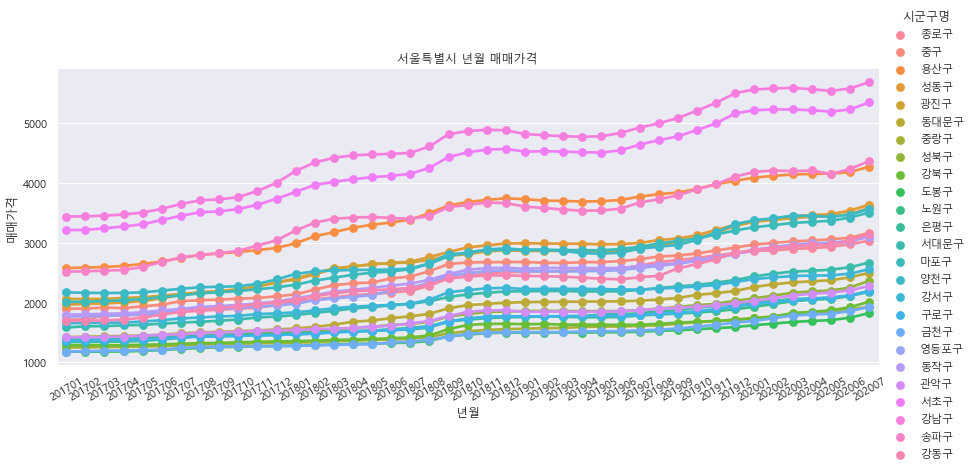

In [48]:
sns.factorplot(x='년월',y='매매가격',hue='시군구명',aspect=2.5,data=a2)
plt.xticks(rotation=30)
plt.title('서울특별시 년월 매매가격')
plt.show()

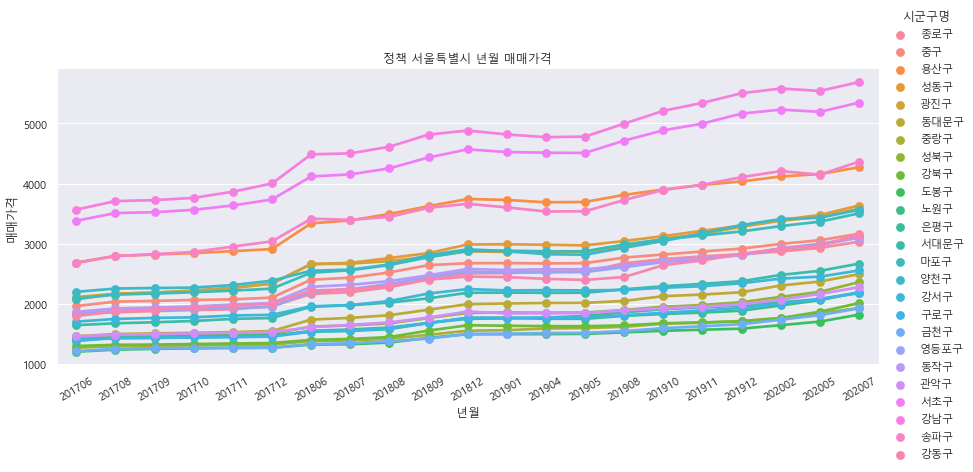

In [49]:
sns.factorplot(x='년월',y='매매가격',hue='시군구명',aspect=2.5,data=a2_s)
plt.xticks(rotation=30)
plt.title('정책 서울특별시 년월 매매가격')
plt.show()

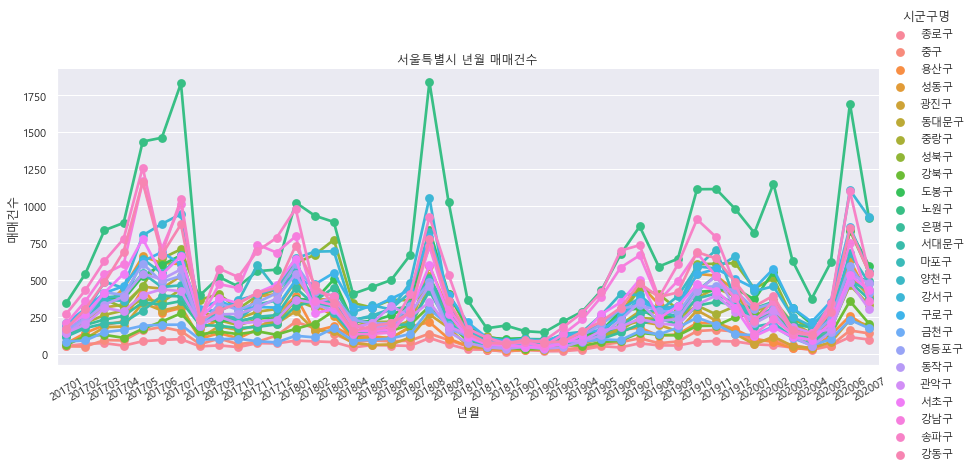

In [50]:
sns.factorplot(x='년월',y='매매건수',hue='시군구명',aspect=2.5,data=a2)
plt.xticks(rotation=30)
plt.title('서울특별시 년월 매매건수')
plt.show()

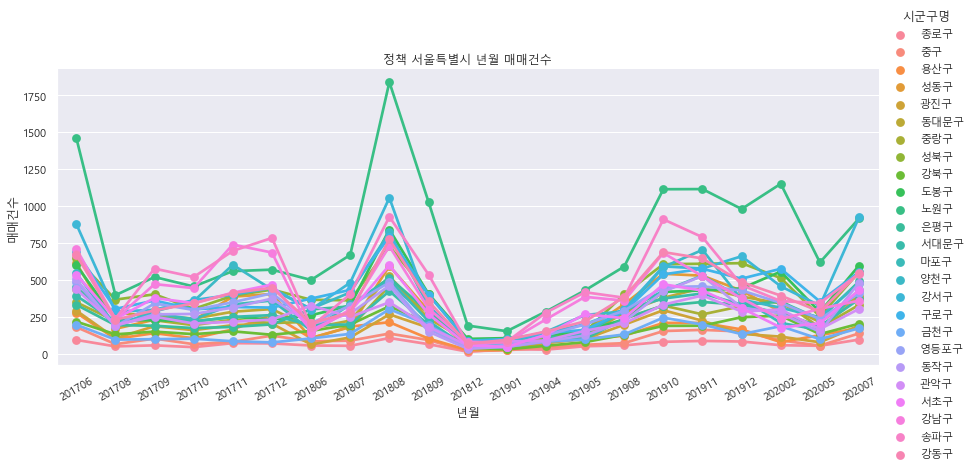

In [51]:
sns.factorplot(x='년월',y='매매건수',hue='시군구명',aspect=2.5,data=a2_s)
plt.xticks(rotation=30)
plt.title('정책 서울특별시 년월 매매건수')
plt.show()

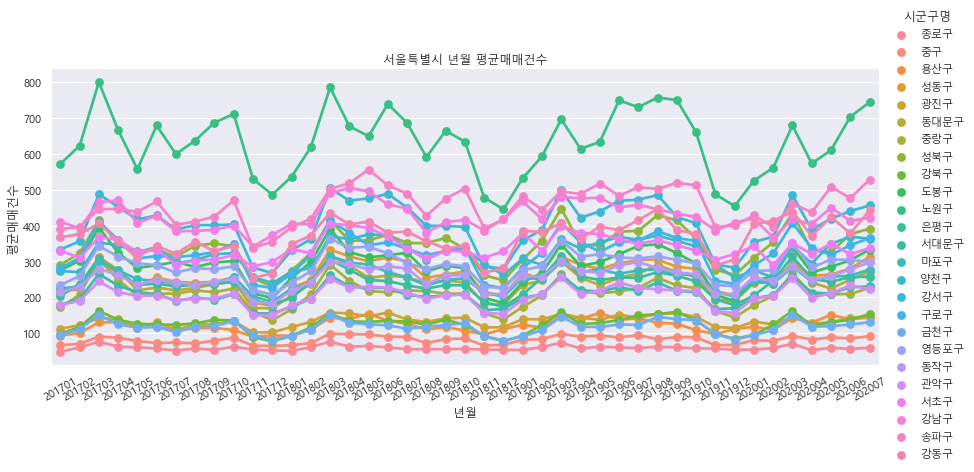

In [52]:
sns.factorplot(x='년월',y='평균매매건수',hue='시군구명',aspect=2.5,data=a2)
plt.xticks(rotation=30)
plt.title('서울특별시 년월 평균매매건수')
plt.show()

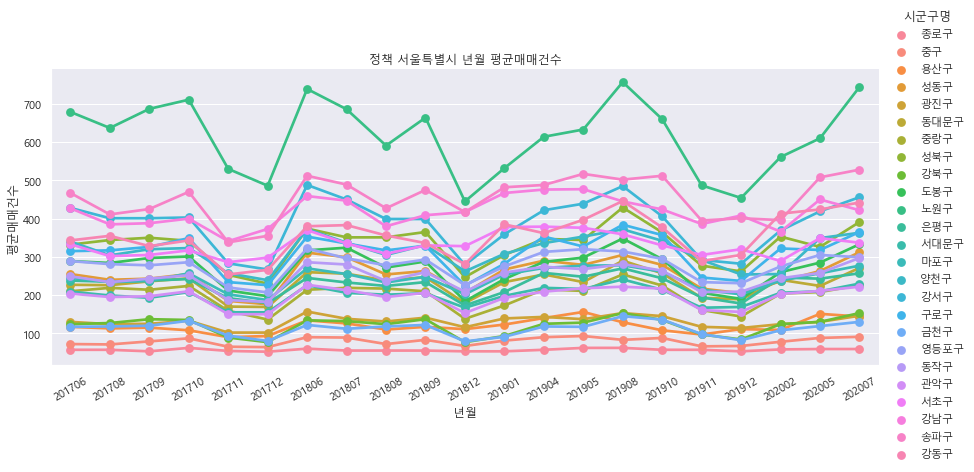

In [53]:
sns.factorplot(x='년월',y='평균매매건수',hue='시군구명',aspect=2.5,data=a2_s)
plt.xticks(rotation=30)
plt.title('정책 서울특별시 년월 평균매매건수')
plt.show()

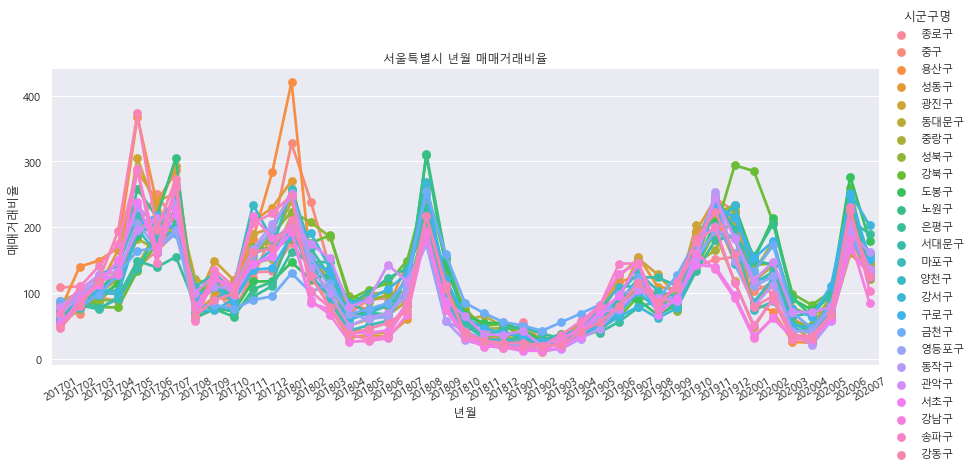

In [54]:
sns.factorplot(x='년월',y='매매거래비율',hue='시군구명',aspect=2.5,data=a2)
plt.xticks(rotation=30)
plt.title('서울특별시 년월 매매거래비율')
plt.show()

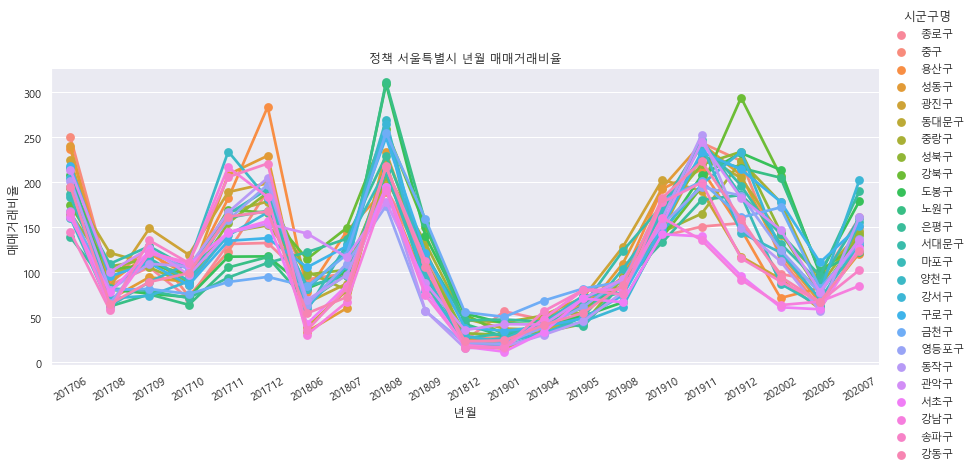

In [55]:
sns.factorplot(x='년월',y='매매거래비율',hue='시군구명',aspect=2.5,data=a2_s)
plt.xticks(rotation=30)
plt.title('정책 서울특별시 년월 매매거래비율')
plt.show()

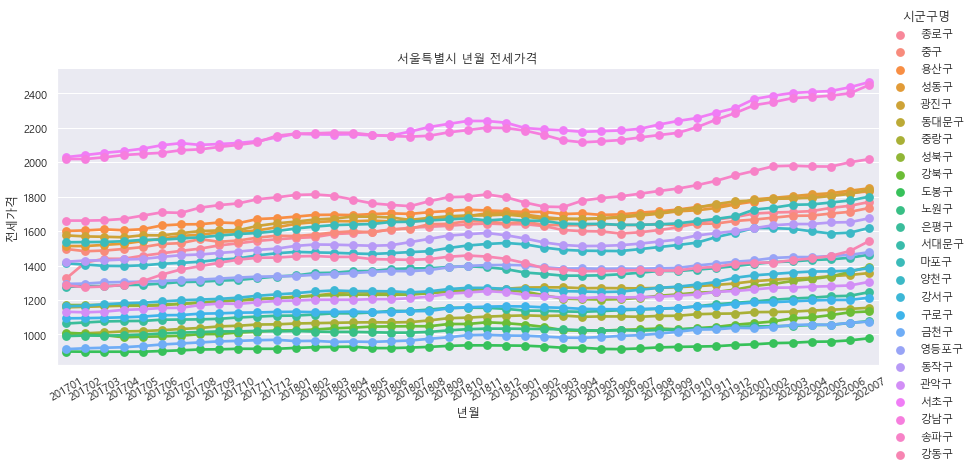

In [56]:
sns.factorplot(x='년월',y='전세가격',hue='시군구명',aspect=2.5,data=a2)
plt.xticks(rotation=30)
plt.title('서울특별시 년월 전세가격')
plt.show()

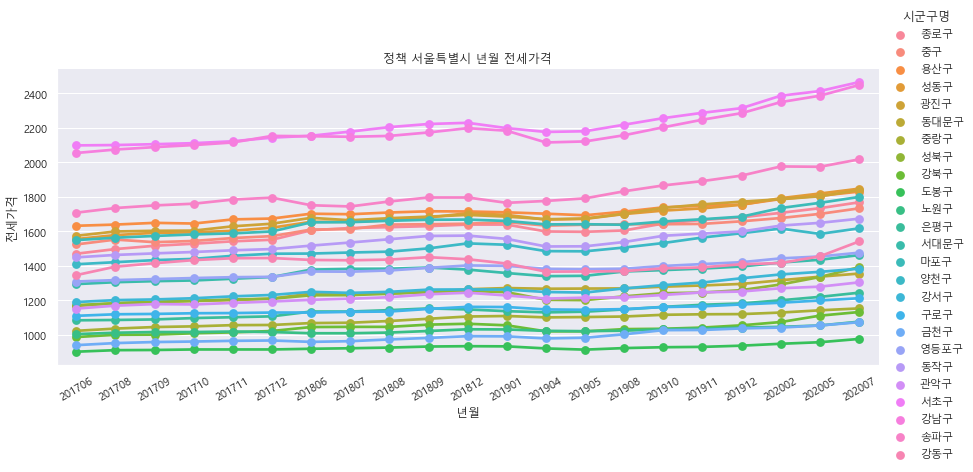

In [57]:
sns.factorplot(x='년월',y='전세가격',hue='시군구명',aspect=2.5,data=a2_s)
plt.xticks(rotation=30)
plt.title('정책 서울특별시 년월 전세가격')
plt.show()

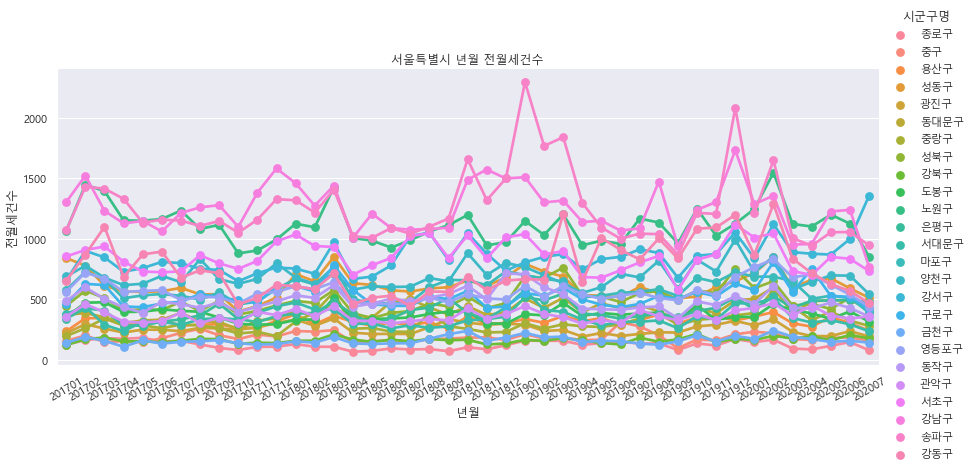

In [58]:
sns.factorplot(x='년월',y='전월세건수',hue='시군구명',aspect=2.5,data=a2)
plt.xticks(rotation=30)
plt.title('서울특별시 년월 전월세건수')
plt.show()

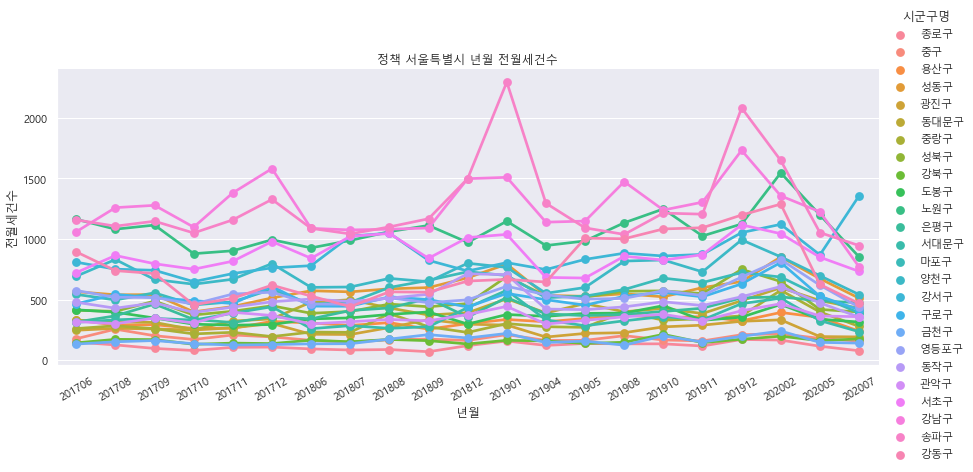

In [59]:
sns.factorplot(x='년월',y='전월세건수',hue='시군구명',aspect=2.5,data=a2_s)
plt.xticks(rotation=30)
plt.title('정책 서울특별시 년월 전월세건수')
plt.show()

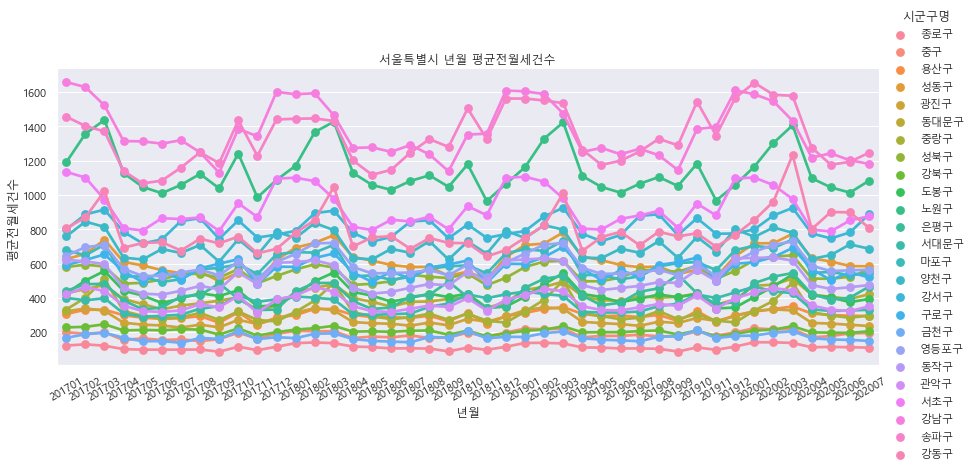

In [60]:
sns.factorplot(x='년월',y='평균전월세건수',hue='시군구명',aspect=2.5,data=a2)
plt.xticks(rotation=30)
plt.title('서울특별시 년월 평균전월세건수')
plt.show()

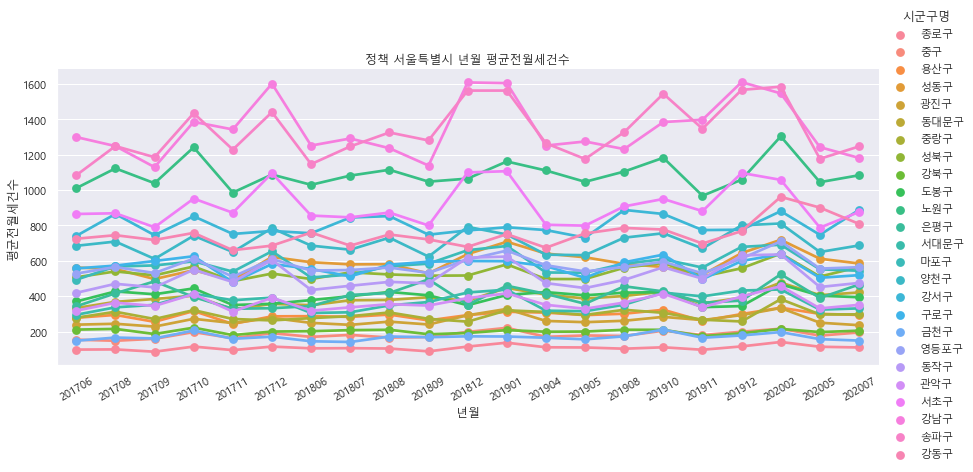

In [61]:
sns.factorplot(x='년월',y='평균전월세건수',hue='시군구명',aspect=2.5,data=a2_s)
plt.xticks(rotation=30)
plt.title('정책 서울특별시 년월 평균전월세건수')
plt.show()

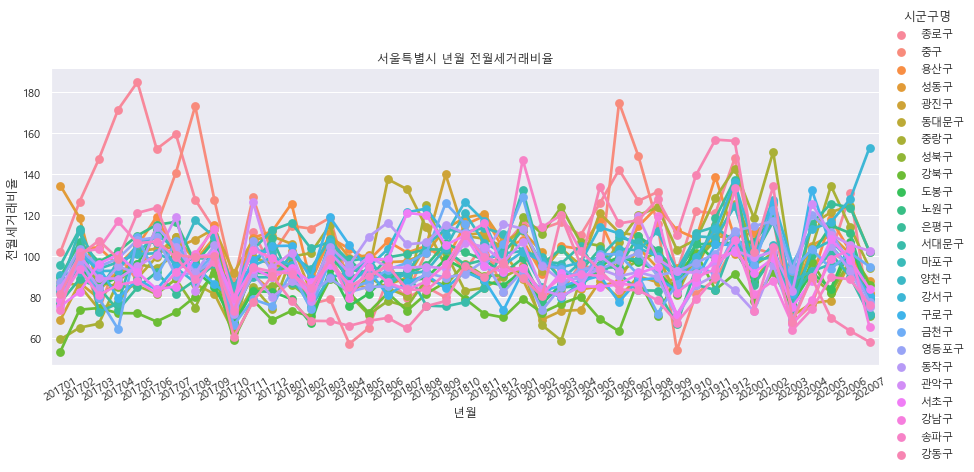

In [62]:
sns.factorplot(x='년월',y='전월세거래비율',hue='시군구명',aspect=2.5,data=a2)
plt.xticks(rotation=30)
plt.title('서울특별시 년월 전월세거래비율')
plt.show()

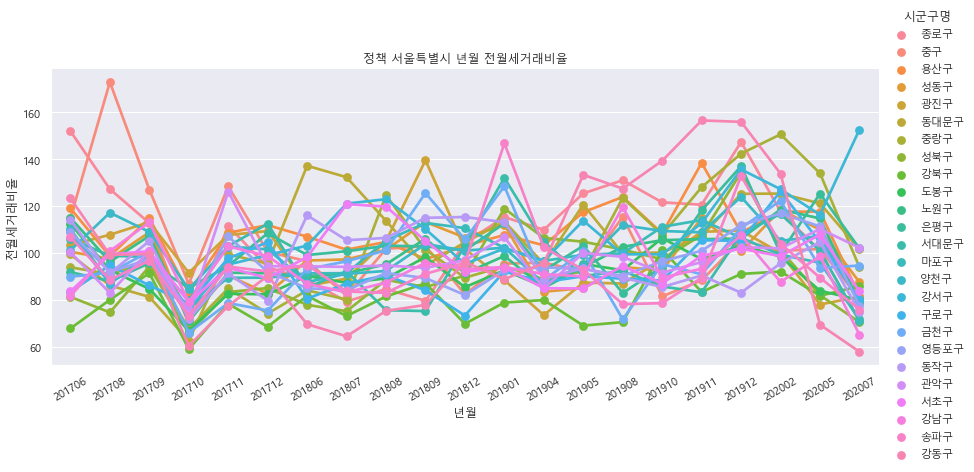

In [63]:
sns.factorplot(x='년월',y='전월세거래비율',hue='시군구명',aspect=2.5,data=a2_s)
plt.xticks(rotation=30)
plt.title('정책 서울특별시 년월 전월세거래비율')
plt.show()

In [64]:
a2_2020=a2[a2['년월']==202002]
a2_2019=a2[a2['년월']==201902]

In [65]:
center = [37.541, 126.986]
m = folium.plugins.DualMap(location=center, zoom_start=11)
folium.Choropleth( geo_data='CTGG.geojson',data=a2_2019,
                  key_on='feature.properties.CTGG_NM',columns=('시군구명', '매매가격'),
                  fill_color='OrRd', legend_name='매매가격').add_to(m.m1)
plugins.MarkerCluster(a2_2019[['위도','경도']].values,
                      popups = list(a2_2019[['시군구명','매매가격']].values)).add_to(m.m1)
folium.Choropleth( geo_data='CTGG.geojson',data=a2_2020,
                  key_on='feature.properties.CTGG_NM',columns=('시군구명', '매매가격'),
                  fill_color='OrRd', legend_name='매매가격').add_to(m.m2)
plugins.MarkerCluster(a2_2020[['위도','경도']].values,
                      popups = list(a2_2020[['시군구명','매매가격']].values)).add_to(m.m2)
m.save("2019&2020 서울특별시 비교 매매가격.html")


In [66]:
center = [37.541, 126.986]
m = folium.plugins.DualMap(location=center, zoom_start=11)
folium.Choropleth( geo_data='CTGG.geojson',data=a2_2019,
                  key_on='feature.properties.CTGG_NM',columns=('시군구명', '매매건수'),
                  fill_color='BuGn', legend_name='매매건수').add_to(m.m1)
plugins.MarkerCluster(a2_2019[['위도','경도']].values,
                      popups = list(a2_2019[['시군구명','매매건수']].values)).add_to(m.m1)
folium.Choropleth( geo_data='CTGG.geojson',data=a2_2020,
                  key_on='feature.properties.CTGG_NM',columns=('시군구명', '매매건수'),
                  fill_color='BuGn', legend_name='매매건수').add_to(m.m2)
plugins.MarkerCluster(a2_2020[['위도','경도']].values,
                      popups = list(a2_2020[['시군구명','매매건수']].values)).add_to(m.m2)
m.save("2019&2020 서울특별시 비교 매매건수.html")


In [67]:
center = [37.541, 126.986]
m = folium.plugins.DualMap(location=center, zoom_start=11)
folium.Choropleth( geo_data='CTGG.geojson',data=a2_2019,
                  key_on='feature.properties.CTGG_NM',columns=('시군구명', '전세가격'),
                  fill_color='OrRd', legend_name='전세가격').add_to(m.m1)
plugins.MarkerCluster(a2_2019[['위도','경도']].values,
                      popups = list(a2_2019[['시군구명','전세가격']].values)).add_to(m.m1)
folium.Choropleth( geo_data='CTGG.geojson',data=a2_2020,
                  key_on='feature.properties.CTGG_NM',columns=('시군구명', '전세가격'),
                  fill_color='OrRd', legend_name='전세가격').add_to(m.m2)
plugins.MarkerCluster(a2_2020[['위도','경도']].values,
                      popups = list(a2_2020[['시군구명','전세가격']].values)).add_to(m.m2)
m.save("2019&2020 서울특별시 비교 전세가격.html")


In [68]:
center = [37.541, 126.986]
m = folium.plugins.DualMap(location=center, zoom_start=11)
folium.Choropleth( geo_data='CTGG.geojson',data=a2_2019,
                  key_on='feature.properties.CTGG_NM',columns=('시군구명', '전월세건수'),
                  fill_color='BuGn', legend_name='전월세건수').add_to(m.m1)
plugins.MarkerCluster(a2_2019[['위도','경도']].values,
                      popups = list(a2_2019[['시군구명','전월세건수']].values)).add_to(m.m1)
folium.Choropleth( geo_data='CTGG.geojson',data=a2_2020,
                  key_on='feature.properties.CTGG_NM',columns=('시군구명', '전월세건수'),
                  fill_color='BuGn', legend_name='전월세건수').add_to(m.m2)
plugins.MarkerCluster(a2_2020[['위도','경도']].values,
                      popups = list(a2_2020[['시군구명','전월세건수']].values)).add_to(m.m2)
m.save("2019&2020 서울특별시 비교 전월세건수.html")


In [69]:
mylist=['매매가격','매매건수','전세가격','전월세건수']
for i in mylist:
    a2[i+'scale']=(a2[i]-a2[i].min())/(a2[i].max()-a2[i].min())+0.01

In [70]:
a2_pt=pd.pivot_table(a2 , index=('년월','시군구명') , values=('위도','경도','매매가격scale'))
nl=[]
for i in a2['년월'].unique():
    temp=a2_pt.loc[i][['위도','경도','매매가격scale']].values.tolist()
    nl.append(temp)
center = [37.541, 126.986]
m = folium.Map(location=center, zoom_start=11)
hm = plugins.HeatMapWithTime(nl,index=a1['년월'].unique().tolist(), radius = 0.035,min_speed=8,max_speed=24,scale_radius=True)
hm.add_to(m)
m.save("서울특별시 년월별 매매가격 변화.html")


In [71]:
a2_pt=pd.pivot_table(a2 , index=('년월','시군구명') , values=('위도','경도','매매건수scale'))
nl=[]
for i in a2['년월'].unique():
    temp=a2_pt.loc[i][['위도','경도','매매건수scale']].values.tolist()
    nl.append(temp)
center = [37.541, 126.986]
m = folium.Map(location=center, zoom_start=11)
hm = plugins.HeatMapWithTime(nl,index=a1['년월'].unique().tolist(), radius = 0.035,min_speed=8,max_speed=24,scale_radius=True)
hm.add_to(m)
m.save("서울특별시 년월별 매매건수 변화.html")


In [72]:
a2_pt=pd.pivot_table(a2 , index=('년월','시군구명') , values=('위도','경도','전세가격scale'))
nl=[]
for i in a2['년월'].unique():
    temp=a2_pt.loc[i][['위도','경도','전세가격scale']].values.tolist()
    nl.append(temp)
center = [37.541, 126.986]
m = folium.Map(location=center, zoom_start=11)
hm = plugins.HeatMapWithTime(nl,index=a1['년월'].unique().tolist(), radius = 0.035,min_speed=8,max_speed=24,scale_radius=True)
hm.add_to(m)
m.save("서울특별시 년월별 전세가격 변화.html")


In [73]:
a2_pt=pd.pivot_table(a2 , index=('년월','시군구명') , values=('위도','경도','전월세건수scale'))
nl=[]
for i in a2['년월'].unique():
    temp=a2_pt.loc[i][['위도','경도','전월세건수scale']].values.tolist()
    nl.append(temp)
center = [37.541, 126.986]
m = folium.Map(location=center, zoom_start=11)
hm = plugins.HeatMapWithTime(nl,index=a1['년월'].unique().tolist(), radius = 0.035,min_speed=8,max_speed=24,scale_radius=True)
hm.add_to(m)
m.save("서울특별시 년월별 전월세건수 변화.html")


# 아파트 관련 데이터 분석
## 부동산 정책
### 2017년
>* 6.19 / 주택시장의 안정적 관리를 위한 선별적·맞춤형 대응방안
* 8.2 / 실수요 보호와 단기 투기수요 억제를 통한 주택시장 안정화 방안
* 9.5 / 8.2 대책 후속조치
* 10.24 / 가계부채 종합대책
* 11.29 / 주거복지로드맵
* 12.13 / 임대주택 등록 활성화 방안

### 2018년
>* 6.28 / 2018년 주거종합계획*, 제2차 장기 주거종합계획(2013~2022) 수정계획
* 7.5 / 신혼부부·청년 주거지원 방안
* 8.27 / 수도권 주택공급 확대 추진 및 투기지역 지정 등을 통한 시장안정 기조 강화
* 9.13 / 주택시장 안정대책
* 9.21 / 수도권 주택공급 확대방안
* 12.19 / 2차 수도권 주택공급 계획 및 수도권 광역교통망 개선방안

### 2019년
>* 1.9 / 등록 임대주택 관리 강화방안
* 4.23 / 2019년 주거종합계획*
* 5.7 / 제3차 신규택지 추진계획
* 8.12 / 민간택지 분양가상한제 적용기준 개선 추진
* 10.1 / 부동산 시장 점검 결과 및 보완방안 (시장안정대책, 분양가상한제 시행령 개정안 보완방안)
* 11.6 / 민간택지 분양가상한제 지정
* 12.16 / 주택시장 안정화 방안

### 2020년
>* 2.20 / 투기 수요 차단을 통한 주택시장 안정적 관리 기조 강화
* 5.6 / 수도권 주택공급 기반 강화 방안
* 5.20 / 2020년 주거종합계획*
* 6.17 / 주택시장 안정을 위한 관리방안
* 7.10 / 주택시장 안정 보완대책
* 8.4 / 서울권역 등 수도권 주택공급 확대방안